In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.timeseries import BoxLeastSquares, LombScargle

def amplitude_spectrum(t, y, fmin=None, fmax=None, oversample_factor=10.0):
    
    tmax = t.max()
    tmin = t.min()
    df = 1.0 / (tmax - tmin)

    if fmin is None:
        fmin = df
    if fmax is None:
        fmax = 0.5 / np.median(np.diff(t))  # *nyq_mult

    freq = np.arange(fmin, fmax, df / oversample_factor)
    model = LombScargle(t, y)
    sc = model.power(freq, method="fast", normalization="psd")

    fct = np.sqrt(4.0 / len(t))
    amp = np.sqrt(sc) * fct

    return freq, amp


In [2]:
cand = [11607193, 9895543, 9845898, 5202905]

In [3]:
c = cand[0]

In [30]:
time, flux, err = np.loadtxt(f'../data/lightcurves/PDC/kplr{str(c).zfill(9)}.csv').T
flux -= 1
pre_time, pre_flux, pre_err = np.loadtxt(f'../prewhitening/results/BIC/{c}.txt').T
pre_flux /= 1e3

(0.0, 5.0)

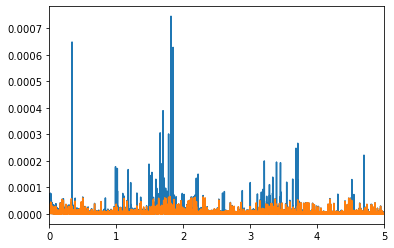

In [37]:
plt.plot(*amplitude_spectrum(time, flux))
plt.plot(*amplitude_spectrum(pre_time, pre_flux))
plt.xlim(0,5)

In [40]:
%run ../transit_search.py